In [323]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [324]:
dataset = pd.read_csv('marketing_campaign.csv')

In [325]:
dataset

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0


## Dataset Information

In [326]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

- No Missing Values
- Dt_Customer though indicates date a customer joined but is still not parsed as DateTime
- simply drop the null value rows
- categorical features need to be encoded

In [327]:
dataset.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


### People
- ID: Customer's unique identifier
- Year_Birth: Customer's birth year
- Education: Customer's education level
- Marital_Status: Customer's marital status
- Income: Customer's yearly household income
- Kidhome: Number of children in customer's household
- Teenhome: Number of teenagers in customer's household
- Dt_Customer: Date of customer's enrollment with the company
- Recency: Number of days since customer's last purchase
- Complain: 1 if the customer complained in the last 2 years, 0 otherwise

### Products

- MntWines: Amount spent on wine in last 2 years
- MntFruits: Amount spent on fruits in last 2 years
- MntMeatProducts: Amount spent on meat in last 2 years
- MntFishProducts: Amount spent on fish in last 2 years
- MntSweetProducts: Amount spent on sweets in last 2 years
- MntGoldProds: Amount spent on gold in last 2 years

### Promotion

- NumDealsPurchases: Number of purchases made with a discount
- AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise
- AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
- AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
- AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise
- AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise
- Response: 1 if customer accepted the offer in the last campaign, 0 otherwise

### Place

- NumWebPurchases: Number of purchases made through the company’s website
- NumCatalogPurchases: Number of purchases made using a catalogue
- NumStorePurchases: Number of purchases made directly in stores
- NumWebVisitsMonth: Number of visits to company’s website in the last month

### Target
- Need to perform clustering to summarize customer segments.

In [328]:
dataset['Dt_Customer'] = pd.to_datetime(dataset['Dt_Customer'])
dataset['Dt_Customer']

C:\Users\Arnav shah\AppData\Local\Temp\ipykernel_27252\1188053646.py:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  dataset['Dt_Customer'] = pd.to_datetime(dataset['Dt_Customer'])


0      2012-04-09
1      2014-08-03
2      2013-08-21
3      2014-10-02
4      2014-01-19
          ...    
2235   2013-06-13
2236   2014-10-06
2237   2014-01-25
2238   2014-01-24
2239   2012-10-15
Name: Dt_Customer, Length: 2240, dtype: datetime64[ns]

In [329]:
print("People categorized on basis of Education\n", dataset['Education'].value_counts())
print("\n\nPeople categorized on basis of their Marital Status\n", dataset['Marital_Status'].value_counts())

People categorized on basis of Education
 Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: Education, dtype: int64


People categorized on basis of their Marital Status
 Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64


Find number of days customer has been shopping relevant to the last recorded

In [330]:
dates = []
for i in dataset['Dt_Customer'] :
    dates.append(i.date())

d = []
de = max(dates)
de

datetime.date(2014, 12, 6)

In [331]:
for i in dates:
    d.append(de - i)
dataset['Cust_for_number_of_days'] = d
dataset['Cust_for_number_of_days']

0      971 days
1      125 days
2      472 days
3       65 days
4      321 days
         ...   
2235   541 days
2236    61 days
2237   315 days
2238   316 days
2239   782 days
Name: Cust_for_number_of_days, Length: 2240, dtype: timedelta64[ns]

Calculate age as of per dataset last updated year

In [332]:
dataset['age'] = 2021 - dataset['Year_Birth']
dataset['age']

0       64
1       67
2       56
3       37
4       40
        ..
2235    54
2236    75
2237    40
2238    65
2239    67
Name: age, Length: 2240, dtype: int64

Calculate total time spent on various items

In [333]:
dataset['Spent_onProd'] = dataset['MntFishProducts'] + dataset['MntFruits'] + dataset['MntGoldProds'] + dataset['MntMeatProducts'] + dataset['MntSweetProducts'] + dataset['MntWines']
dataset['Spent_onProd']

0       1617
1         27
2        776
3         53
4        422
        ... 
2235    1341
2236     444
2237    1241
2238     843
2239     172
Name: Spent_onProd, Length: 2240, dtype: int64

In [334]:
dataset["Total_purchases"] = dataset["NumCatalogPurchases"] + dataset["NumDealsPurchases"] + dataset["NumStorePurchases"]+dataset["NumWebPurchases"]

In [335]:
dataset["TotalAcceptedCmp"] = dataset["AcceptedCmp1"] + dataset["AcceptedCmp2"] + dataset["AcceptedCmp3"] + dataset["AcceptedCmp4"] + dataset["AcceptedCmp5"]
dataset["TotalAcceptedCmp"]

0       0
1       0
2       0
3       0
4       0
       ..
2235    0
2236    1
2237    1
2238    0
2239    0
Name: TotalAcceptedCmp, Length: 2240, dtype: int64

In [336]:
dataset['Living_status'] = dataset['Marital_Status'].replace({'Married' : 'Companion', 'Together':'Companion', 'Absurd':'Single', 'Widow':'Single', 'YOLO':'Single', 'Divorced':'Single', 'Alone':'Single'})
dataset['Living_status']

0          Single
1          Single
2       Companion
3       Companion
4       Companion
          ...    
2235    Companion
2236    Companion
2237       Single
2238    Companion
2239    Companion
Name: Living_status, Length: 2240, dtype: object

In [337]:
dataset['Children_count'] = dataset['Kidhome']+dataset['Teenhome']


In [338]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
k = le.fit_transform(dataset['Living_status'])
dataset['Size_family'] = k + dataset['Children_count']
dataset['Size_family']

0       1
1       3
2       0
3       1
4       1
       ..
2235    1
2236    3
2237    1
2238    1
2239    2
Name: Size_family, Length: 2240, dtype: int64

In [339]:
dataset['chk_Parent'] = np.where(dataset['Children_count']>0,1,0)

In [340]:
dataset["Education"].unique()

array(['Graduation', 'PhD', 'Master', 'Basic', '2n Cycle'], dtype=object)

In [341]:
dataset['Education_level'] = dataset['Education'].replace({"Basic":"UG", "2n Cycle":"UG", "Graduation":"Graduate", "PhD":"PG", "Master":"PG"})
dataset['Education_level']

0       Graduate
1       Graduate
2       Graduate
3       Graduate
4             PG
          ...   
2235    Graduate
2236          PG
2237    Graduate
2238          PG
2239          PG
Name: Education_level, Length: 2240, dtype: object

Marital_Status, Dt_Customer, Z_CostContact, Z_Revenue, Year_Birth, ID are not required

In [342]:
cols_to_drop = ["Response","Complain","MntWines","MntFruits","MntMeatProducts","MntFishProducts","MntSweetProducts","MntGoldProds","NumDealsPurchases","NumWebPurchases","NumCatalogPurchases","NumStorePurchases","NumWebVisitsMonth","Marital_Status", "Dt_Customer", "Education", "Year_Birth", "Z_CostContact", "Z_Revenue", "ID","Teenhome","Kidhome","AcceptedCmp1","AcceptedCmp2","AcceptedCmp3","AcceptedCmp4","AcceptedCmp5"]
dataset = dataset.drop(cols_to_drop, axis=1)

In [343]:
dataset

,Income,Recency,Cust_for_number_of_days,age,Spent_onProd,Total_purchases,TotalAcceptedCmp,Living_status,Children_count,Size_family,chk_Parent,Education_level
0,58138.0,58,971 days,64,1617,25,0,Single,0,1,0,Graduate
1,46344.0,38,125 days,67,27,6,0,Single,2,3,1,Graduate
2,71613.0,26,472 days,56,776,21,0,Companion,0,0,0,Graduate
3,26646.0,26,65 days,37,53,8,0,Companion,1,1,1,Graduate
4,58293.0,94,321 days,40,422,19,0,Companion,1,1,1,PG
...,...,...,...,...,...,...,...,...,...,...,...,...
2235,61223.0,46,541 days,54,1341,18,0,Companion,1,1,1,Graduate
2236,64014.0,56,61 days,75,444,22,1,Companion,3,3,1,PG
2237,56981.0,91,315 days,40,1241,19,1,Single,0,1,0,Graduate
2238,69245.0,8,316 days,65,843,23,0,Companion,1,1,1,PG


In [344]:
dataset= dataset.dropna()
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2216 entries, 0 to 2239
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype          
---  ------                   --------------  -----          
 0   Income                   2216 non-null   float64        
 1   Recency                  2216 non-null   int64          
 2   Cust_for_number_of_days  2216 non-null   timedelta64[ns]
 3   age                      2216 non-null   int64          
 4   Spent_onProd             2216 non-null   int64          
 5   Total_purchases          2216 non-null   int64          
 6   TotalAcceptedCmp         2216 non-null   int64          
 7   Living_status            2216 non-null   object         
 8   Children_count           2216 non-null   int64          
 9   Size_family              2216 non-null   int64          
 10  chk_Parent               2216 non-null   int32          
 11  Education_level          2216 non-null   object         
dtypes: float64(1), int32

C:\Users\Arnav shah\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\pandas\plotting\_matplotlib\misc.py:97: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(


<Figure size 1000x800 with 0 Axes>

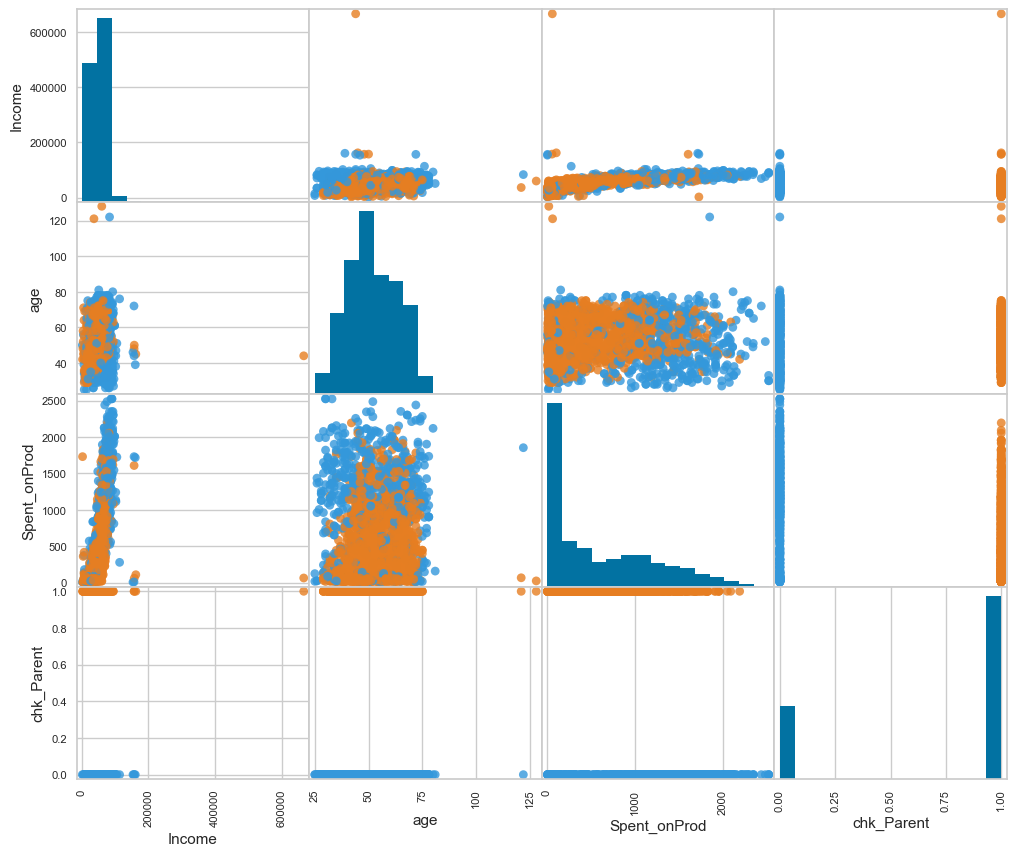

In [345]:
colors = ["#3498db", "#e74c3c", "#2ecc71", "#f1c40f", "#9b59b6", "#e67e22"]
cmap = plt.cm.colors.ListedColormap(colors)

# Select features to plot
To_Plot = ["Income", "Cust_for_number_of_days", "age", "Spent_onProd", "chk_Parent"]

plt.figure(figsize=(10, 8))
scatter_matrix = pd.plotting.scatter_matrix(
    dataset[To_Plot],
    c=dataset["chk_Parent"].map({0: colors[0], 1: colors[-1]}),
    marker="o",
    s=40,
    alpha=0.8,
    cmap=cmap,
    hist_kwds={"bins": 15},
    figsize=(12, 10)
)

##### As visible from above scatter plot
- Age and income have a few extreme values which may prevent the model from getting trained on the general data....
Thus, the outliers shall be removed

In [346]:
dataset = dataset[(dataset['age']<95)]
dataset = dataset[(dataset['Income']<350000)]

In [347]:
dataset

,Income,Recency,Cust_for_number_of_days,age,Spent_onProd,Total_purchases,TotalAcceptedCmp,Living_status,Children_count,Size_family,chk_Parent,Education_level
0,58138.0,58,971 days,64,1617,25,0,Single,0,1,0,Graduate
1,46344.0,38,125 days,67,27,6,0,Single,2,3,1,Graduate
2,71613.0,26,472 days,56,776,21,0,Companion,0,0,0,Graduate
3,26646.0,26,65 days,37,53,8,0,Companion,1,1,1,Graduate
4,58293.0,94,321 days,40,422,19,0,Companion,1,1,1,PG
...,...,...,...,...,...,...,...,...,...,...,...,...
2235,61223.0,46,541 days,54,1341,18,0,Companion,1,1,1,Graduate
2236,64014.0,56,61 days,75,444,22,1,Companion,3,3,1,PG
2237,56981.0,91,315 days,40,1241,19,1,Single,0,1,0,Graduate
2238,69245.0,8,316 days,65,843,23,0,Companion,1,1,1,PG


##### Observe Correlation among different features

C:\Users\Arnav shah\AppData\Local\Temp\ipykernel_27252\4276233656.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = dataset.corr()


<AxesSubplot: >

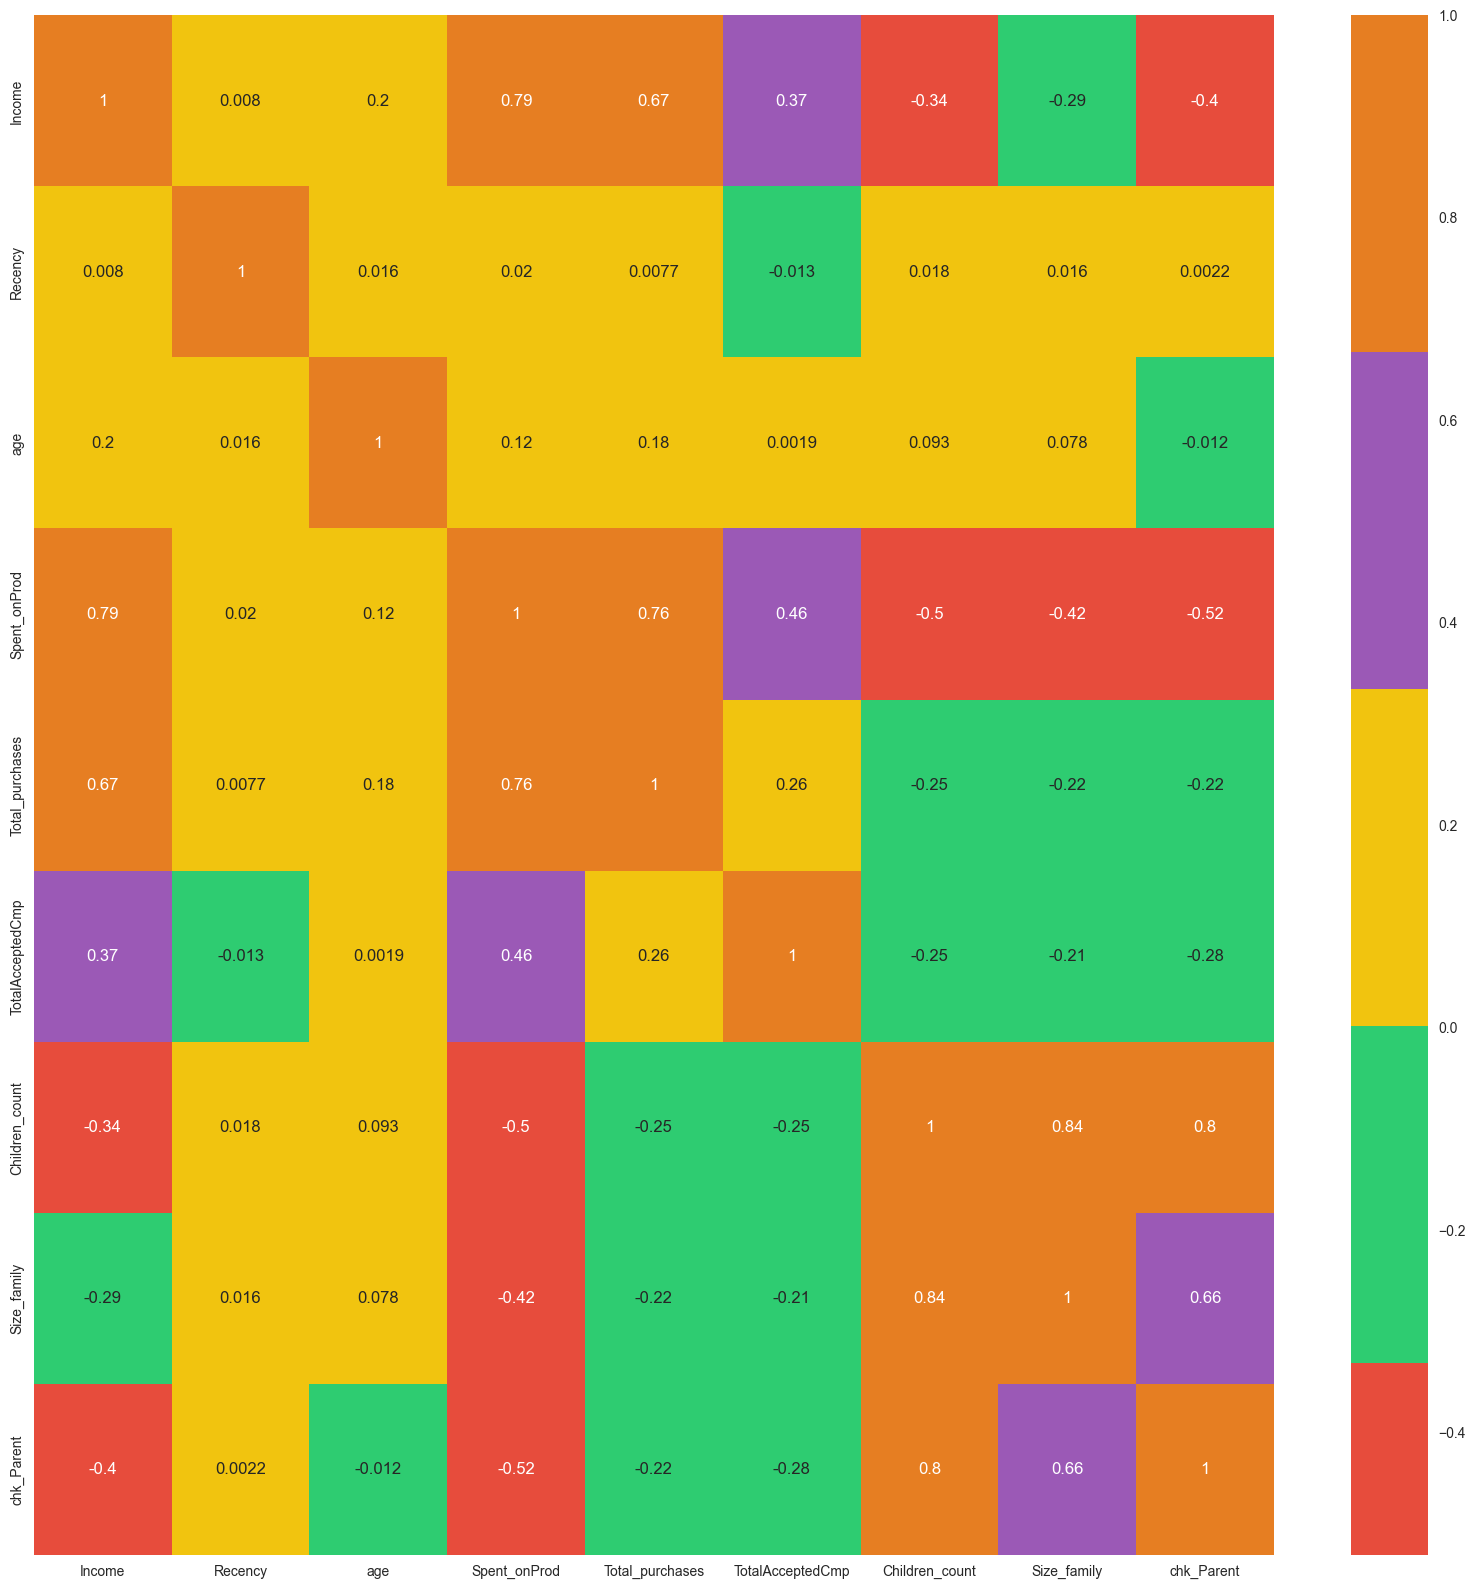

In [348]:
correlation_matrix = dataset.corr()
plt.figure(figsize=(20,20))
sns.heatmap(correlation_matrix, annot = True, cmap = colors, center = 0)

Text(0.5, 1.0, 'Impact of Education on expenses')

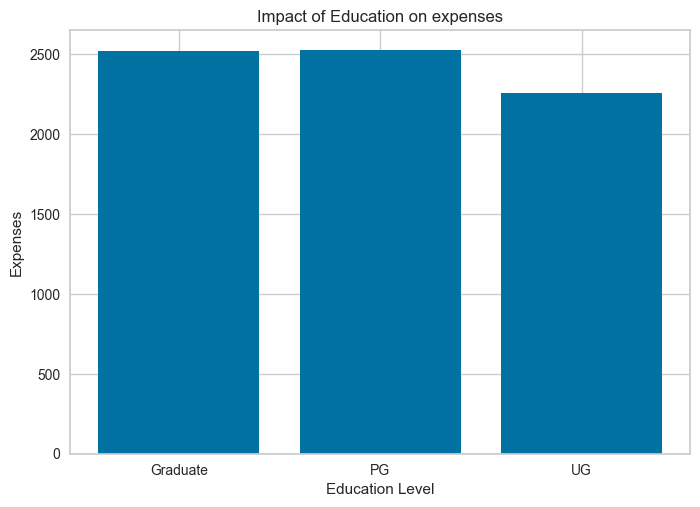

In [349]:
plt.bar(dataset['Education_level'], dataset['Spent_onProd'])
plt.xlabel('Education Level')
plt.ylabel('Expenses')
plt.title("Impact of Education on expenses")

Text(0.5, 1.0, 'Impact of age on expenses')

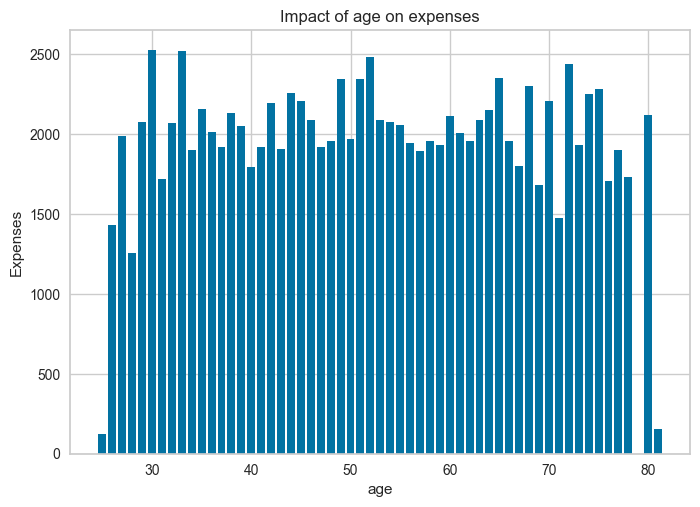

In [350]:
plt.bar(dataset['age'], dataset['Spent_onProd'])
plt.xlabel('age')
plt.ylabel('Expenses')
plt.title("Impact of age on expenses")

Text(0.5, 1.0, 'Impact of Marital Status on expenses')

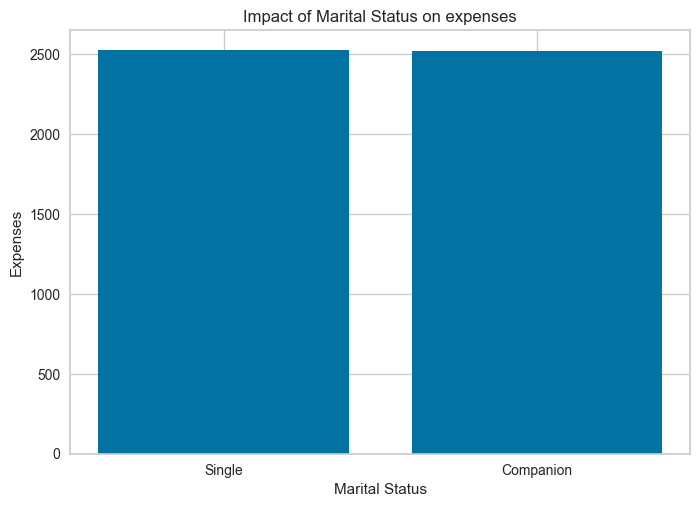

In [351]:
plt.bar(dataset['Living_status'], dataset['Spent_onProd'])
plt.xlabel('Marital Status')
plt.ylabel('Expenses')
plt.title("Impact of Marital Status on expenses")

([<matplotlib.axis.XTick at 0x286e3b9a9b0>,
 [Text(0, 0, '0'), Text(1, 0, '1'), Text(2, 0, '2'), Text(3, 0, '3')])

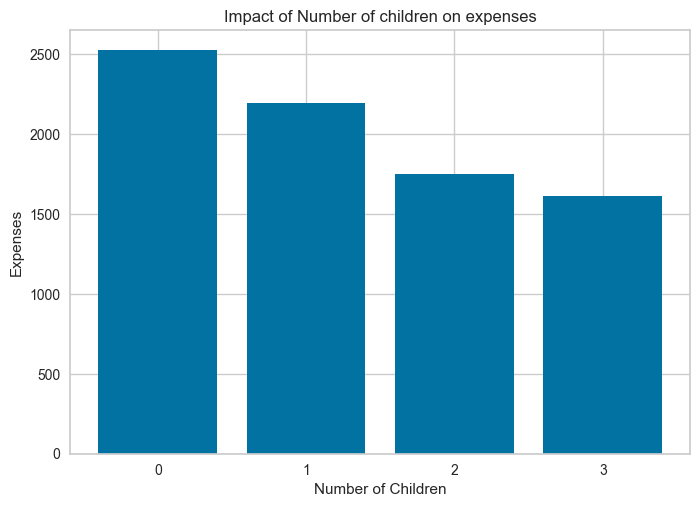

In [352]:
plt.bar(dataset['Children_count'], dataset['Spent_onProd'])
plt.xlabel('Number of Children')
plt.ylabel('Expenses')
plt.title("Impact of Number of children on expenses")
plt.xticks([0,1,2,3])

Text(0.5, 1.0, "Impact of Offers Accepted in Campaigns on user's Expenses")

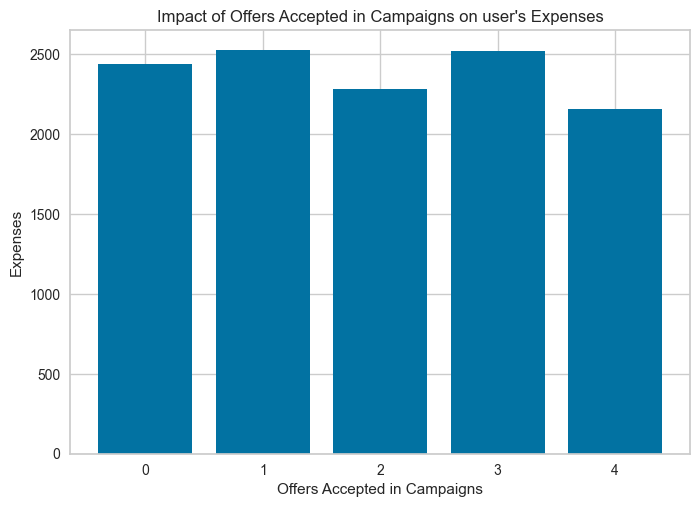

In [353]:
plt.bar(dataset['TotalAcceptedCmp'], dataset['Spent_onProd'])
plt.xlabel('Offers Accepted in Campaigns')
plt.ylabel('Expenses')
plt.title("Impact of Offers Accepted in Campaigns on user's Expenses")

### Data Preprocessing

In [354]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2212 entries, 0 to 2239
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype          
---  ------                   --------------  -----          
 0   Income                   2212 non-null   float64        
 1   Recency                  2212 non-null   int64          
 2   Cust_for_number_of_days  2212 non-null   timedelta64[ns]
 3   age                      2212 non-null   int64          
 4   Spent_onProd             2212 non-null   int64          
 5   Total_purchases          2212 non-null   int64          
 6   TotalAcceptedCmp         2212 non-null   int64          
 7   Living_status            2212 non-null   object         
 8   Children_count           2212 non-null   int64          
 9   Size_family              2212 non-null   int64          
 10  chk_Parent               2212 non-null   int32          
 11  Education_level          2212 non-null   object         
dtypes: float64(1), int32

- Education level and Living Status need to be label encoded
- Cust_for_number_of_days need to be converted to int/float


In [355]:
dataset['Education_level'] = le.fit_transform(dataset['Education_level'])
dataset['Living_status'] = le.fit_transform(dataset['Living_status'])
dataset['Cust_for_number_of_days'] = dataset['Cust_for_number_of_days'].dt.total_seconds().astype(int)

In [356]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2212 entries, 0 to 2239
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Income                   2212 non-null   float64
 1   Recency                  2212 non-null   int64  
 2   Cust_for_number_of_days  2212 non-null   int32  
 3   age                      2212 non-null   int64  
 4   Spent_onProd             2212 non-null   int64  
 5   Total_purchases          2212 non-null   int64  
 6   TotalAcceptedCmp         2212 non-null   int64  
 7   Living_status            2212 non-null   int32  
 8   Children_count           2212 non-null   int64  
 9   Size_family              2212 non-null   int64  
 10  chk_Parent               2212 non-null   int32  
 11  Education_level          2212 non-null   int32  
dtypes: float64(1), int32(4), int64(7)
memory usage: 190.1 KB


In [357]:
dataset_scaled = dataset.copy()

In [358]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler().fit_transform(dataset_scaled.values)
dataset_scaled = pd.DataFrame(sc, index=dataset_scaled.index, columns=dataset_scaled.columns)

In [359]:
dataset_scaled.describe()

,Income,Recency,Cust_for_number_of_days,age,Spent_onProd,Total_purchases,TotalAcceptedCmp,Living_status,Children_count,Size_family,chk_Parent,Education_level
count,2.212000e+03,2.212000e+03,2.212000e+03,2.212000e+03,2.212000e+03,2.212000e+03,2.212000e+03,2.212000e+03,2.212000e+03,2212.000000,2.212000e+03,2.212000e+03
mean,-1.252765e-16,4.015273e-18,1.333071e-16,6.183521e-17,5.942604e-17,-8.030546e-18,3.694051e-17,2.730386e-17,2.248553e-17,0.000000,1.606109e-17,1.445498e-17
std,1.000226e+00,1.000226e+00,1.000226e+00,1.000226e+00,1.000226e+00,1.000226e+00,1.000226e+00,1.000226e+00,1.000226e+00,1.000226,1.000226e+00,1.000226e+00
min,-2.333791e+00,-1.694030e+00,-2.202781e+00,-2.315280e+00,-9.998189e-01,-1.941552e+00,-4.391600e-01,-7.409586e-01,-1.264598e+00,-1.493861,-1.581139e+00,-8.935862e-01
25%,-7.771113e-01,-8.646302e-01,-7.404087e-01,-6.912026e-01,-8.935732e-01,-8.985131e-01,-4.391600e-01,-7.409586e-01,-1.264598e+00,-0.346493,-1.581139e+00,-8.935862e-01
50%,-2.731156e-02,-6.717941e-04,3.680820e-03,-9.285849e-02,-3.490638e-01,1.414610e-02,-4.391600e-01,-7.409586e-01,6.998729e-02,-0.346493,6.324555e-01,-8.935862e-01
75%,7.679525e-01,8.632866e-01,7.477704e-01,8.473966e-01,7.316544e-01,7.964254e-01,-4.391600e-01,1.349603e+00,6.998729e-02,0.800876,6.324555e-01,5.716567e-01
max,5.131311e+00,1.727245e+00,2.369283e+00,2.471473e+00,3.183607e+00,3.795163e+00,5.448245e+00,1.349603e+00,2.739158e+00,3.095612,6.324555e-01,2.036900e+00


### Dimentionality Reduction with PCA

Due to too many factors, the final classification becomes difficult. Since, many of the features are correlated, they are basically redundant. So, we will perform dimentionality reduction on the dataset and reduce the dimensions to 3 before putting it through a classifier.

In [360]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn import metrics
from yellowbrick.cluster import KElbowVisualizer

In [361]:
p = PCA(n_components=3)
p.fit(dataset_scaled)
# dataset_dimention_reduced = pd.DataFrame(p.fit_transform(dataset_scaled), columns=['c1','c2','c3'])

PCA(n_components=3)

In [362]:
# dataset_dimention_reduced.describe()

### Finding Optimal number of clusters - ELBOW METHOD

C:\Users\Arnav shah\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Arnav shah\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Arnav shah\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warn

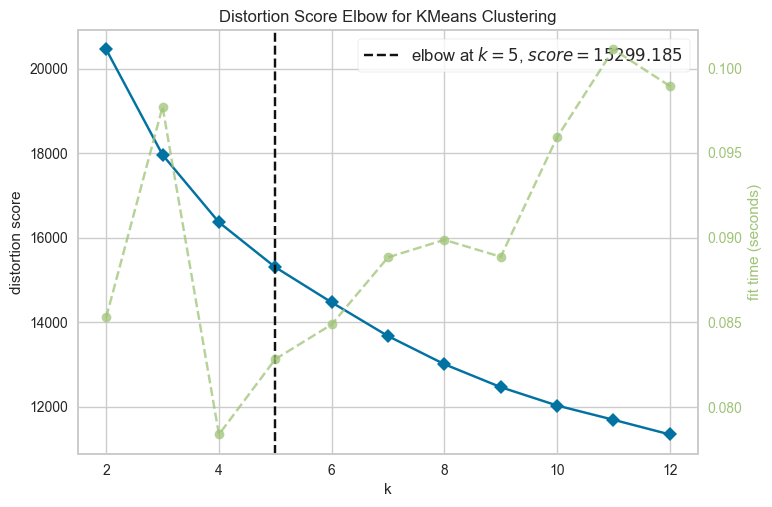

<AxesSubplot: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [363]:
El = KElbowVisualizer(KMeans(), k=12)
El.fit(dataset_scaled)
El.show()

#### KMeans

In [367]:
KM = KMeans(n_clusters=5,init="k-means++", random_state=42)
y_kmeans = KM.fit_predict(dataset_scaled)

C:\Users\Arnav shah\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [368]:
y_kmeans

array([3, 1, 3, ..., 3, 4, 1])

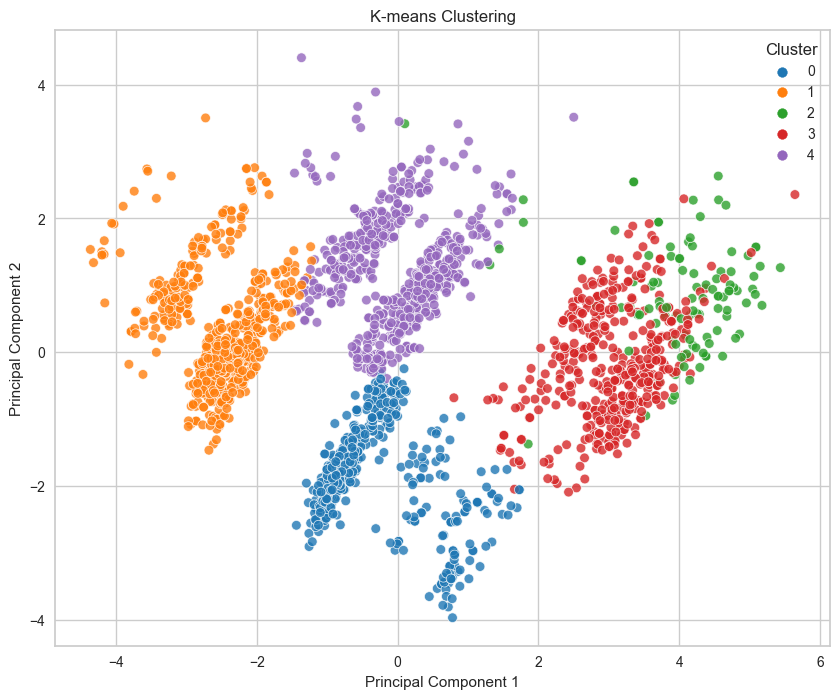

In [369]:
pca = PCA(n_components=2)
red_data = pca.fit_transform(dataset_scaled)
dataset_scaled['Clusters'] = y_kmeans
plt.figure(figsize=(10, 8))
sns.scatterplot(x=red_data[:, 0], y=red_data[:, 1], hue=y_kmeans, data=dataset_scaled, palette='tab10', alpha=0.8)
plt.title('K-means Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster', loc='upper right')
plt.show()